<a href="https://colab.research.google.com/github/barauna-lo/Computational_Statistics/blob/main/HandsOn_09/CAP417_HandsOn09_Barauna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[<img src=https://raw.githubusercontent.com/barauna-lo/CAP4213-Deep-Learning/main/logoinpe.png align=”middle”>](https://www.gov.br/inpe/pt-br)

[<center><img src="https://github.com/barauna-lo/Deep-Learning/blob/main/LogoCAP.png?raw=true" width = 450 align="middle"></center>](http://www.inpe.br/posgraduacao/cap/)


# CAP 417 - PARTE C - HANDS-ON 01

* [Luan Orion Baraúna](https://www.linkedin.com/in/luan-orion-barauna/)



Bibliotecas e Comandos Necessários:

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import norm
import io
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline

Importação das Séries Temporais para este notebook:

In [2]:
# #Importar um arquivo do seu desktop para o Colab

# #File from your computer:
from google.colab import files

# uploaded = files.upload()

# for fn in uploaded.keys():
#   print('User uploaded file "{name}" with length {length} bytes'.format(
#       name=fn, length=len(uploaded[fn])))

# #File from GoogleDrive:
# #from google.colab import drive
# #drive.mount('/content/drive')

In [3]:
!gdown --id 1HuCXmgk2tKq4Bo6Uvl3m2-Bwhn2cLvgg
!gdown --id 1STW2t3V3MqJM9epEHje0eNZATSTjQrSL

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1HuCXmgk2tKq4Bo6Uvl3m2-Bwhn2cLvgg
To: /content/endo.csv
100% 30.7k/30.7k [00:00<00:00, 27.4MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1STW2t3V3MqJM9epEHje0eNZATSTjQrSL
To: /content/exo.csv
100% 31.8k/31.8k [00:00<00:00, 30.4MB/s]


In [4]:
dfendo = pd.read_csv('endo.csv')
dfexo = pd.read_csv('exo.csv')

In [5]:
dfendo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4095 entries, 0 to 4094
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1.0206  4095 non-null   float64
dtypes: float64(1)
memory usage: 32.1 KB


STEP01: Plotando a ST (com Opção de Média Zero)

exemplo: série endo

In [62]:
dx=dfendo
#dx=dfexo

In [ ]:
#Opções de Normalização
#dx = (dx-min(dx))/(max(dx)-min(dx))
#Obs: Não é necessário neste hands-on

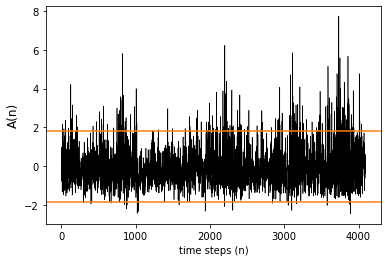

In [78]:
dx=dfendo
dx=(dx - np.mean(dx))/np.std(dx)
plt.plot(dx, color="black", linewidth=0.6)
plt.xlabel('time steps (n)')
plt.ylabel('A(n)', fontsize='large')
#plt.xlim([1, 4096])
plt.axhline(y=3*sigma,color='C1')
plt.axhline(y=-3*sigma,color='C1')
plt.show()

STEP 2: OBTER 3SIGMA E REMOVER VALORES ACIMA DE 3SIGMA  

(VOCÊ DEVE IMPLEMENTAR ESSE MÓDULO)

In [83]:
#Identificação de 3σ
sigma = float(np.std(dfendo))
#Remoção de 3σ
dx1 = dfendo[(dfendo < 3*sigma)] 
#https://stackoverflow.com/questions/41800424/remove-rows-in-python-less-than-a-certain-value

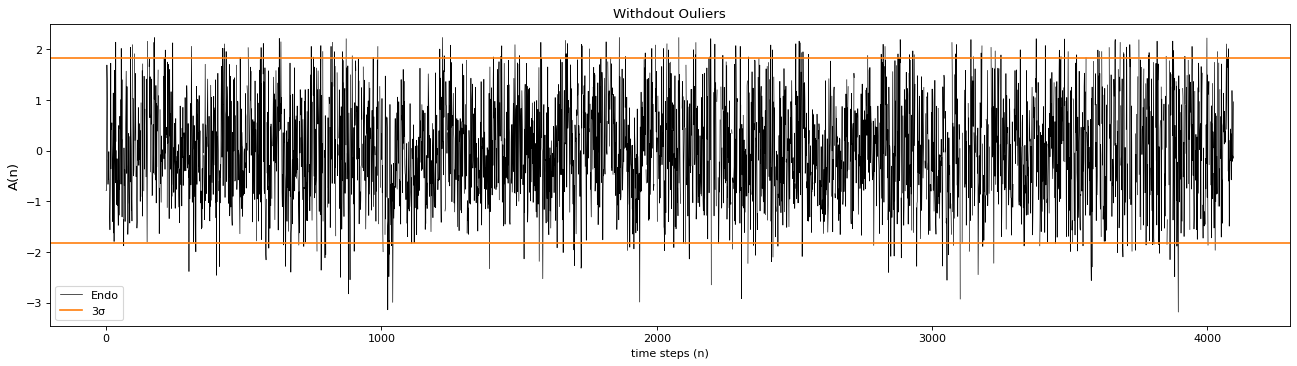

In [88]:
from matplotlib.pyplot import figure
figure(figsize=(20,5),dpi=80)
dx1=(dx1 - np.mean(dx1))/np.std(dx1)
plt.plot(dx1, color="black", linewidth=0.6,label='Endo')
plt.xlabel('time steps (n)')
plt.ylabel('A(n)', fontsize='large')
plt.axhline(y=3*sigma,color='C1',label='3σ')
plt.axhline(y=-3*sigma,color='C1')
plt.title('Withdout Ouliers')
plt.legend()
plt.show()

Veja exemplo na transparencia enviada ao final da aula 2. Nesse caso, teremos uma 2a ST a partir da 1a ST. A original e a outra sem as flutuações extremas.
Denomine essa 2a ST como dfendo2 ou dfexo2. Plote os histogramas para cada uma r calcule os momentos estatísticos K e S, seguindo os passos abaixo.  Note que teremos ao final 4 series temporais: dfendo e dfendo2, dexo e dexo2. 

In [ ]:
#IMPLEMENTAR A IDENTIFICACAO E A EXTRAÇÃO DOS VALORES > 3SIGMA, 
#GERANDO A SEGUNDA SERIE SEM AS FLUTUAÇÕES EXTREMAS.

STEP 3: HISTOGRAMA COM AJUSTE

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Blue Bins')

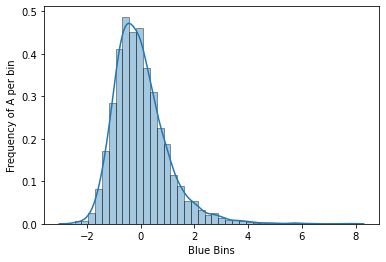

In [89]:
# seaborn histogram with Kernel Density Estimation
sns.distplot(dx, bins=40, hist_kws={'edgecolor':'black'})
plt.ylabel('Frequency of A per bin')
plt.xlabel('Blue Bins')

STEP 4: CÁLCULO DOS MOMENTOS ESTATÍSTICOS E PLOTAGEM DOS PARAMETROS DE CULLEN-FREY (K E Sˆ2)

In [ ]:
from scipy.stats import skew, kurtosis
A=dx
m=np.mean(A)
std=np.std(A)
s=skew(A)
k1=kurtosis(A)
k2=k1+3

print("mean =", m, end='\n')
print("std =", std, end='\n')
print("skewness =", s, end='\n')
print("Fisher Kurtosis =", k1, end='\n')
print("Pearson Kurtosis =", k2, end='\n\n')

#ss=s*s
#k=k2

statrib = (m, std, s, k2)
print("All set (Pearson Stat):")
for n in statrib:
    
    print(n, end=' , ')

print()

mean = 1.0206    1.670811e-15
dtype: float64
std = 1.0206    1.0
dtype: float64
skewness = [1.32881725]
Fisher Kurtosis = [3.85028336]
Pearson Kurtosis = [6.85028336]

All set (Pearson Stat):
1.0206    1.670811e-15
dtype: float64 , 1.0206    1.0
dtype: float64 , [1.32881725] , [6.85028336] , 


STEP 5: CONSTRUA E PLOTE O ESPAÇO DE PARÂMETROS (KURTOSIS X QUADRADO DO 
SKEWNESS) COM OS RESPECTIVOS VALORES PARA ENDO.CSV (2 ST) E EXO.CSV (2 ST) (USE CORES DIFRENTES)